In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


In [2]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 확인 및 전처리

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
vote_df.sample(10)

dataset shape:  (36425, 78)


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
31833,17458,2.0,526,1.0,866,4.0,1354,2.0,1250,2.0,1305,4.0,523,3.0,810,1.0,2247,5.0,3969,3.0,3796,5.0,953,5.0,1556,1.0,1088,5.0,752,1.0,983,1.0,739,1.0,1124,3.0,89,3.0,1129,2.0,2377,10s,2,1,2,Male,2,1,White,Other,1,2,0,4,2,1,1,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
23714,1472,2.0,2827,4.0,1015,2.0,1098,2.0,909,1.0,2955,1.0,466,5.0,1292,1.0,2486,1.0,2047,5.0,922,4.0,1972,5.0,915,5.0,663,1.0,595,2.0,123,1.0,1056,1.0,645,1.0,983,1.0,683,4.0,932,40s,3,1,1,Female,2,2,White,Christian_Catholic,0,6,2,2,2,4,5,6,2,1,3,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1
28687,16770,1.0,293,1.0,804,1.0,679,1.0,631,1.0,751,1.0,526,1.0,244,1.0,1071,1.0,1048,1.0,1817,5.0,1886,5.0,996,1.0,606,1.0,240,1.0,1040,4.0,465,2.0,434,1.0,766,4.0,426,5.0,1854,10s,2,1,2,Male,1,1,Asian,Agnostic,1,0,1,4,2,1,5,4,2,1,2,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1
9446,22305,1.0,285,1.0,986,3.0,1344,1.0,863,3.0,879,1.0,413,1.0,589,1.0,1459,2.0,2178,4.0,1632,3.0,1207,1.0,1676,4.0,1048,2.0,555,4.0,482,4.0,948,1.0,504,2.0,988,5.0,690,2.0,999,10s,1,1,2,Male,1,1,White,Christian_Other,6,2,5,3,2,2,6,0,5,6,3,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0
18526,29042,3.0,802,1.0,895,5.0,742,1.0,521,2.0,2054,1.0,390,5.0,721,3.0,1066,5.0,988,5.0,800,5.0,813,3.0,687,4.0,600,1.0,364,1.0,597,5.0,635,2.0,554,1.0,1443,5.0,519,5.0,671,40s,3,1,1,Female,1,3,White,Christian_Other,4,0,3,4,7,7,7,7,7,7,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
22718,5845,1.0,341,2.0,996,4.0,619,2.0,629,1.0,1129,1.0,533,5.0,500,4.0,2792,2.0,683,2.0,2112,2.0,1008,5.0,637,3.0,745,2.0,924,4.0,583,4.0,624,4.0,326,2.0,511,5.0,355,5.0,641,10s,2,1,3,Male,1,1,White,Christian_Protestant,1,5,1,5,0,1,2,2,4,2,3,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1
15934,9657,1.0,450,4.0,656,4.0,2856,1.0,804,2.0,1019,1.0,438,2.0,1558,3.0,1938,3.0,2235,2.0,1739,3.0,1444,5.0,585,5.0,324,2.0,411,4.0,481,4.0,764,1.0,559,5.0,19285,5.0,545,4.0,964,10s,1,1,1,Male,1,1,White,Atheist,4,1,3,5,2,2,6,0,1,5,3,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
17456,1070,2.0,421,4.0,775,5.0,783,1.0,951,1.0,820,1.0,389,1.0,369,3.0,1736,2.0,1195,4.0,968,2.0,1195,5.0,490,4.0,759,2.0,363,5.0,432,3.0,879,1.0,381,3.0,926,5.0,361,4.0,816,30s,4,1,5,Female,1,2,White,Agnostic,4,2,1,4,1,3,4,6,2,5,2,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
28368,26186,1.0,535,1.0,996,1.0,607,4.0,1335,2.0,1103,5.0,411,5.0,1219,1.0,1114,5.0,4344,1.0,1281,5.0,1474,5.0,10979,1.0,912,5.0,450,1.0,924,1.0,695,5.0,550,1.0,829,1.0,817,1.0,1281,40s,4,1,4,Female,1,1,Other,Other,2,4,1,2,1,0,0,6,2,2,2,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,0
892,33792,2.0,324,4.0,1032,5.0,680,2.0,763,2.0,1482,2.0,705,2.0,548,2.0,1020,3.0,1152,3.0,897,3.0,1041,5.0,485,4.0,1112,2.0,496,4.0,953,4.0,872,2.0,343,2.0,598,3.0,503,4.0,716,20s,2,1,2,Male,1,1,White,Agnostic,4,6,1,6,2,1,3,5,1,2,3,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  QjA         36425 non-nul

In [5]:
vote_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.00000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000
mean,22740.586520,2.131942,9.392264e+02,2.897598,2.053925e+03,3.661414,1461.583775,1.750748,1.499025e+03,2.320494,1.897114e+03,2.167742,1.911749e+03,2.560220,1.287380e+03,2.316047,2.243674e+03,3.166699,3.508262e+03,3.574084,2.647131e+03,3.822704,1.910627e+03,4.330734,4.253209e+03,3.509979,1.665842e+03,2.635772,956.472258,3.213672,1410.536884,3.067756,1.632666e+03,2.842169,1.114106e+03,2.827948,2.632989e+03,3.431187,1.163574e+03,3.224104,2.059381e+03,2.548250,1.272752,2.621002,1.170487,1.387975,3.018174,2.61930,1.755717,3.025614,1.333342,2.462759,2.022704,3.509952,2.272340,4.317968,2.179574,0.453178,0.080494,0.163294,0.118600,0.709623,0.934468,0.208730,0.868717,0.895072,0.329087,0.938888,0.971613,0.202663,0.945532,0.393988,0.947536,0.926781
std,13118.110333,1.199763,1.372469e+04,1.568342,1.984665e+04,1.431303,8097.443081,1.046655,1.109992e+04,1.370584,1.508537e+04,1.349821,8.217648e+04,1.509689,9.914887e+03,1.460773,1.373760e+04,1.482101,9.409606e+04,1.360288,6.022463e+04,1.368946,2.086329e+04,1.144399,4.095916e+05,1.375125,2.834511e+04,1.475278,5753.950736,1.478189,8745.676887,1.492889,2.626450e+04,1.405662,2.285452e+04,1.426399,1.657403e+05,1.374757,7.501528e+03,1.522649,4.413002e+04,0.941273,0.449247,5.438894,0.468163,0.640297,2.005182,1.89422,1.676886,2.036558,1.451165,1.998749,1.779602,1.971593,1.845983,1.724866,0.761658,0.497810,0.272060,0.369639,0.323322,0.453943,0.247465,0.406407,0.337715,0.306465,0.469888,0.239539,0.166078,0.401989,0.226942,0.488639,0.222964,0.260499
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11403.000000,1.000000,4.040000e+02,1.000000,8.760000e+02,2.000000,651.000000,1.000000,6.810000e+02,1.000000,8.360000e+02,1.000000,5.050000e+02,1.000000,5.490000e+02,1.000000,1.081000e+03,2.000000,1.257000e+03,2.000000,9.040000e+02,3.000000,8.600000e+02,4.000000,8.060000e+02,2.000000,6.510000e+02,1.000000,430.000000,2.000000,638.000000,2.000000,7.050000e+02,2.000000,4.620000e+02,2.000000,7.950000e+02,2.000000,5.290000e+0

In [6]:
# 불균형 분포인지 확인
print(vote_df['voted'].value_counts())
unsatisfied_cnt = vote_df[vote_df['voted'] == 1].voted.count()
total_cnt = vote_df.voted.count()
print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt / total_cnt))

0    19918
1    16507
Name: voted, dtype: int64
unsatisfied 비율은 0.45


선거 투표 여부
- 0 = No
- 1 = Yes

In [7]:
# NA값 확인
print(vote_df.isna().sum())

index         0
QaA           0
QaE           0
QbA           0
QbE           0
QcA           0
QcE           0
QdA           0
QdE           0
QeA           0
QeE           0
QfA           0
QfE           0
QgA           0
QgE           0
QhA           0
QhE           0
QiA           0
QiE           0
QjA           0
QjE           0
QkA           0
QkE           0
QlA           0
QlE           0
QmA           0
QmE           0
QnA           0
QnE           0
QoA           0
QoE           0
QpA           0
QpE           0
QqA           0
QqE           0
QrA           0
QrE           0
QsA           0
QsE           0
QtA           0
QtE           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
tp01          0
tp02          0
tp03          0
tp04          0
tp05          0
tp06          0
tp07          0
tp08          0
tp09          0
tp10          0
urban         0
voted         0
wf_01   

In [24]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

### 결손값 처리

In [10]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']
for i in range(97, 117):  # 질문을 답할 때까지의 시간
    s = 'Q' + chr(i) + 'E'
    zero_features.append(s)

# 전체 데이터 건수
total_count = vote_df['education'].count()
print("전체 데이터 건수는 ", total_count)
print()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = vote_df[vote_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
print()
    
# tp 범위 검사
tp_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    tp_features.append(s)
    
# 피처별로 반복하면서 데이터 값이 01~07을 벗어난 데이터 건수 추출하고 퍼센트 계산
for feature in tp_features:
    cnt = vote_df[vote_df[feature] < 1][feature].count() + vote_df[vote_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

print("value > 7\tvalue == 7\tvalue < 0")
for feature in tp_features:
    cnt1 = vote_df[vote_df[feature] > 7][feature].count()
    cnt2 = vote_df[vote_df[feature] == 0][feature].count() # tp__ 데이터 결손값이 모두 0임을 확인
    cnt3 = vote_df[vote_df[feature] < 0][feature].count()
    print("%d\t\t%d\t\t%d" % (cnt1, cnt2, cnt3))
    
zero_features = zero_features + tp_features


전체 데이터 건수는  36425

education 0 건수는 432, 퍼센트는 1.19 %
engnat 0 건수는 63, 퍼센트는 0.17 %
hand 0 건수는 135, 퍼센트는 0.37 %
urban 0 건수는 258, 퍼센트는 0.71 %
QaE 0 건수는 0, 퍼센트는 0.00 %
QbE 0 건수는 0, 퍼센트는 0.00 %
QcE 0 건수는 0, 퍼센트는 0.00 %
QdE 0 건수는 0, 퍼센트는 0.00 %
QeE 0 건수는 0, 퍼센트는 0.00 %
QfE 0 건수는 0, 퍼센트는 0.00 %
QgE 0 건수는 0, 퍼센트는 0.00 %
QhE 0 건수는 1, 퍼센트는 0.00 %
QiE 0 건수는 1, 퍼센트는 0.00 %
QjE 0 건수는 1, 퍼센트는 0.00 %
QkE 0 건수는 2, 퍼센트는 0.01 %
QlE 0 건수는 0, 퍼센트는 0.00 %
QmE 0 건수는 0, 퍼센트는 0.00 %
QnE 0 건수는 0, 퍼센트는 0.00 %
QoE 0 건수는 0, 퍼센트는 0.00 %
QpE 0 건수는 1, 퍼센트는 0.00 %
QqE 0 건수는 1, 퍼센트는 0.00 %
QrE 0 건수는 0, 퍼센트는 0.00 %
QsE 0 건수는 0, 퍼센트는 0.00 %
QtE 0 건수는 0, 퍼센트는 0.00 %

tp01 건수는 3822, 퍼센트는 10.49 %
tp02 건수는 4356, 퍼센트는 11.96 %
tp03 건수는 9348, 퍼센트는 25.66 %
tp04 건수는 4414, 퍼센트는 12.12 %
tp05 건수는 12682, 퍼센트는 34.82 %
tp06 건수는 7148, 퍼센트는 19.62 %
tp07 건수는 7858, 퍼센트는 21.57 %
tp08 건수는 2547, 퍼센트는 6.99 %
tp09 건수는 7027, 퍼센트는 19.29 %
tp10 건수는 1158, 퍼센트는 3.18 %

value > 7	value == 7	value < 0
0		3822		0
0		4356		0
0		9348		0
0		4414		0
0		126

In [11]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

### 이상값 처리

<AxesSubplot:>

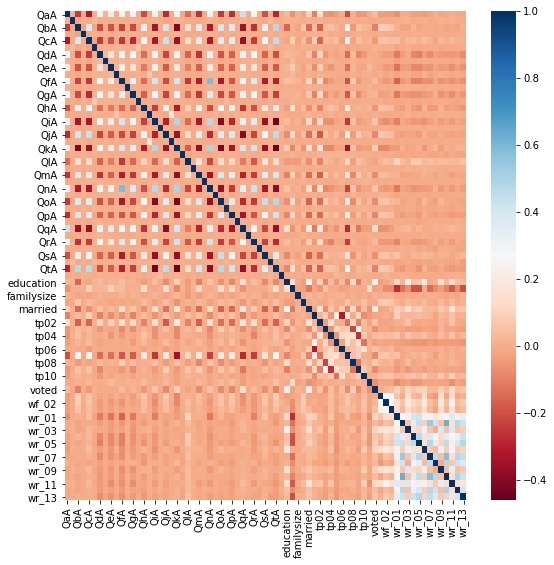

In [12]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [13]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["tp07"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [14]:
outlier_index = get_outlier(df=vote_df, column="QjE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="QkE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="wr_12", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

이상치 데이터 인덱스: Int64Index([   11,   168,   262,   277,   312,   401,   409,   426,   456,
              465,
            ...
            36077, 36150, 36155, 36202, 36205, 36322, 36352, 36370, 36392,
            36393],
           dtype='int64', length=871)
이상치 데이터 인덱스 개수: 871
이상치 데이터 인덱스: Int64Index([    1,   103,   111,   191,   253,   291,   312,   319,   328,
              384,
            ...
            35694, 35934, 36042, 36063, 36129, 36150, 36199, 36205, 36244,
            36274],
           dtype='int64', length=743)
이상치 데이터 인덱스 개수: 743
이상치 데이터 인덱스: Int64Index([  119,   149,   291,   407,   430,   564,   589,   593,   734,
              756,
            ...
            35449, 35513, 35520, 35581, 36118, 36122, 36194, 36336, 36356,
            36400],
           dtype='int64', length=507)
이상치 데이터 인덱스 개수: 507


### 데이터 변환

In [15]:
# 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음)
# 레이블 인코딩 적용 : age_group
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels
print("인코딩 변환값:", labels)
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본값:", encoder.inverse_transform([1,2,3,4,5]))

인코딩 변환값: [2 1 2 ... 3 4 5]
인코딩 클래스: ['+70s' '10s' '20s' '30s' '40s' '50s' '60s']
디코딩 원본값: ['10s' '20s' '30s' '40s' '50s']


In [16]:
# 원-핫 인코딩 적용 : gender, race, religion
vote_df = pd.get_dummies(data = vote_df, columns = ["gender"], prefix="gender")
vote_df = pd.get_dummies(data = vote_df, columns = ["race"], prefix="race")
vote_df = pd.get_dummies(data = vote_df, columns = ["religion"], prefix="religion")


In [17]:
vote_df.head(5)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,742,1.0,330,5.0,541,5.0,1376.0,2.0,1397.0,5.0,1250.0,2.0,762.0,5.0,517,4.0,3614,1.0,521,5.0,705,4.0,633.0,1.0,330.0,1.0,512,5.0,347,5.0,588,2,3.0,1.0,2,1.0,1,2.000000,2.0000,1.000000,5.0,2.000000,4.0,5.000000,4.000000,1.00000,2.0,2.0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,3077,3.0,6721,1.0,1306,4.0,2968.0,5.0,1998.0,5.0,2756.0,2.0,3429.0,5.0,2395,5.0,1745,1.0,584,5.0,1857,5.0,2894.0,2.0,3761.0,1.0,2717,3.0,2802,5.0,1299,1,2.0,2.0,4,1.0,1,1.000000,2.6193,2.000000,2.0,1.333342,6.0,1.000000,5.000000,5.00000,6.0,3.0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,1474,5.0,728,4.0,1107,3.0,1743.0,5.0,3008.0,3.0,1649.0,5.0,870.0,1.0,1551,1.0,989,5.0,347,1.0,824,1.0,1445.0,2.0,884.0,5.0,744,1.0,899,4.0,963,2,2.0,1.0,3,1.0,1,3.018174,1.0000,1.755717,5.0,3.000000,6.0,2.022704,2.000000,1.00000,6.0,2.0,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,4.0,182,1.0,2969,1.0,1955,4.0,4630,1.0,1321,3.0,2345,4.0,850,1.0,3559.0,5.0,6761.0,1.0,8315.0,5.0,614.0,1.0,1751,1.0,1919,4.0,96,4.0,1251,5.0,261.0,4.0,548.0,4.0,2576,2.0,877,5.0,967,1,3.0,2.0,3,1.0,1,2.000000,2.0000,4.000000,5.0,1.333342,1.0,2.022704,2.000000,2.27234,4.0,1.0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4.0,549,5.0,1679,5.0,481,3.0,595,1.0,1202,1.0,348,1.0,422,2.0,2453.0,1.0,1051.0,5.0,4733.0,3.0,2705.0,5.0,773,4.0,775,2.0,1066,5.0,824,1.0,750.0,4.0,535.0,4.0,1000,4.0,964,5.0,683,2,2.0,1.0,4,1.0,1,6.000000,3.0000,6.000000,2.0,1.333342,6.0,2.000000,3.509952,6.00000,4.0,2.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### StandardScaler

In [18]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(vote_df)
# vote_scaled = scaler.transform(vote_df)

# vote_df_scaled = pd.DataFrame(data=vote_scaled)
# print(vote_df_scaled.mean())

# 모델 학습

In [19]:
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
print("피처 데이터 shape:{0}".format(X_features.shape))

피처 데이터 shape:(36425, 94)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape:{0}, 테스트 세트 Shape:{1}".format(X_train.shape, X_test.shape))

print(" 학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(29140, 94), 테스트 세트 Shape:(7285, 94)
 학습 세트 레이블 값 분포 비율
0    0.546328
1    0.453672
Name: voted, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.548799
1    0.451201
Name: voted, dtype: float64


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=0)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb.predict(X_test)
w_pred_proba = xgb.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.673937
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.658197
[2]	validation_0-logloss:0.645227
[3]	validation_0-logloss:0.634345
[4]	validation_0-logloss:0.62515
[5]	validation_0-logloss:0.617189
[6]	validation_0-logloss:0.610365
[7]	validation_0-logloss:0.604756
[8]	validation_0-logloss:0.599606
[9]	validation_0-logloss:0.595115
[10]	validation_0-logloss:0.591599
[11]	validation_0-logloss:0.588292
[12]	validation_0-logloss:0.585245
[13]	validation_0-logloss:0.582561
[14]	validation_0-logloss:0.580328
[15]	validation_0-logloss:0.578529
[16]	validation_0-logloss:0.576628
[17]	validation_0-logloss:0.574984
[18]	validation_0-logloss:0.573623
[19]	validation_0-logloss:0.572612
[20]	validation_0-logloss:0.571402
[21]	validation_0-logloss:0.570429
[22]	validation_0-logloss:0.569491
[23]	validation_0-logloss:0.568707
[24]	validation_0-logloss:0.567716
[25]	validation_0-logloss:0.567087
[26]	validation_0-logloss:0.5664

[230]	validation_0-logloss:0.558196
[231]	validation_0-logloss:0.558113
[232]	validation_0-logloss:0.558097
[233]	validation_0-logloss:0.558102
[234]	validation_0-logloss:0.558173
Stopping. Best iteration:
[134]	validation_0-logloss:0.557319

오차 행렬
[[2601 1397]
 [ 838 2449]]
정확도: 0.6932, 정밀도: 0.6368, 재현율: 0.7451, F1: 0.6867, AUC:0.7698
